<a href="https://colab.research.google.com/github/DerekMazino/BigData-Dunti/blob/main/InformeDatosCovid19Colombia/InformeDuntiCamiloMarin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/UIS/Septimo Semestre/BigData')
print(os.getcwd())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/UIS/Septimo Semestre/BigData


In [70]:
#@title 2. **Load Libs** { display-mode: "form" }
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
pd.__version__

'1.1.4'

In [71]:
#@title **code** Cargando Dataset
data = pd.read_csv("data/Casos_positivos_de_COVID-19_en_ColombiaP.csv", delimiter=';')
data.head()



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/03/20 0:00,1.0,2/03/20 0:00,11.0,BOGOTA,11001.0,BOGOTA,19.0,1.0,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/02/20 0:00,NaN,6/03/20 0:00,13/03/20 0:00,PCR,6.0,NaN
1,9/03/20 0:00,2.0,6/03/20 0:00,76.0,VALLE,76111.0,BUGA,34.0,1.0,M,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,4/03/20 0:00,NaN,9/03/20 0:00,19/03/20 0:00,PCR,5.0,NaN
2,9/03/20 0:00,3.0,7/03/20 0:00,5.0,ANTIOQUIA,5001.0,MEDELLIN,50.0,1.0,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,29/02/20 0:00,NaN,9/03/20 0:00,15/03/20 0:00,PCR,6.0,NaN
3,11/03/20 0:00,4.0,9/03/20 0:00,5.0,ANTIOQUIA,5001.0,MEDELLIN,55.0,1.0,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,6/03/20 0:00,NaN,11/03/20 0:00,26/03/20 0:00,PCR,6.0,NaN
4,11/03/20 0:00,5.0,9/03/20 0:00,5.0,ANTIOQUIA,5001.0,MEDELLIN,25.0,1.0,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,8/03/20 0:00,NaN,11/03/20 0:00,23/03/20 0:00,PCR,6.0,NaN


In [72]:
#@title **code** Detectando valores null
#very important to clean values. 
for col in data.columns:
    print (col, np.sum(pd.isnull(data[col])))

fecha reporte web 0
ID de caso 1
Fecha de notificación 1
Código DIVIPOLA departamento 1
Nombre departamento 1
Código DIVIPOLA municipio 1
Nombre municipio 1
Edad 1
Unidad de medida de edad 1
Sexo 1
Tipo de contagio 1
Ubicación del caso 3091
Estado 3091
Código ISO del país 745857
Nombre del país 745856
Recuperado 2171
Fecha de inicio de síntomas 94310
Fecha de muerte 718192
Fecha de diagnóstico 4153
Fecha de recuperación 35486
Tipo de recuperación 35486
Pertenencia étnica 1
Nombre del grupo étnico 733711


In [73]:
#@title **code** Remplazando valores null
data['Código ISO del país'] = data['Código ISO del país'].fillna(169)
data['Pertenencia étnica'] = data['Pertenencia étnica'].fillna(0)
data['Nombre del país'] = data['Nombre del país'].fillna('Colombia')
data['Fecha de recuperación'] = data['Fecha de recuperación'].fillna('No recuperado')
data['Tipo de recuperación'] = data['Tipo de recuperación'].fillna('No recuperado')
data['Fecha de inicio de síntomas'] = data['Fecha de inicio de síntomas'].fillna('No hay registro')
data['Fecha de muerte'] = data['Fecha de muerte'].fillna('No ha muerto')
data

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/03/20 0:00,1.0,2/03/20 0:00,11.0,BOGOTA,11001.0,BOGOTA,19.0,1.0,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/02/20 0:00,No ha muerto,6/03/20 0:00,13/03/20 0:00,PCR,6.0,NaN
1,9/03/20 0:00,2.0,6/03/20 0:00,76.0,VALLE,76111.0,BUGA,34.0,1.0,M,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,4/03/20 0:00,No ha muerto,9/03/20 0:00,19/03/20 0:00,PCR,5.0,NaN
2,9/03/20 0:00,3.0,7/03/20 0:00,5.0,ANTIOQUIA,5001.0,MEDELLIN,50.0,1.0,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,29/02/20 0:00,No ha muerto,9/03/20 0:00,15/03/20 0:00,PCR,6.0,NaN
3,11/03/20 0:00,4.0,9/03/20 0:00,5.0,ANTIOQUIA,5001.0,MEDELLIN,55.0,1.0,M,Relacionado,Casa,Leve,169.0,Colombia,Recuperado,6/03/20 0:00,No ha muerto,11/03/20 0:00,26/03/20 0:00,PCR,6.0,NaN
4,11/03/20 0:00,5.0,9/03/20 0:00,5.0,ANTIOQUIA,5001.0,MEDELLIN,25.0,1.0,M,Relacionado,Casa,Leve,169.0,Colombia,Recuperado,8/03/20 0:00,No ha muerto,11/03/20 0:00,23/03/20 0:00,PCR,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746784,18/09/20 0:00,746825.0,16/09/20 0:00,20.0,CESAR,20001.0,VALLEDUPAR,85.0,1.0,F,En estudio,Casa,Leve,169.0,Colombia,Recuperado,16/09/20 0:00,No ha muerto,17/09/20 0:00,1/10/20 0:00,Tiempo,6.0,NaN
746785,18/09/20 0:00,746826.0,15/09/20 0:00,20.0,CESAR,20001.0,VALLEDUPAR,21.0,1.0,M,En estudio,Casa,Leve,169.0,Colombia,Recuperado,15/09/20 0:00,No ha muerto,17/09/20 0:00,1/10/20 0:00,Tiempo,6.0,NaN
746786,18/09/20 0:00,746827.0,15/09/20 0:00,20.0,CESAR,20001.0,VALLEDUPAR,32.0,1.0,M,En estudio,Casa,Leve,169.0,Colombia,Recuperado,15/09/20 0:00,No ha muerto,17/09/20 0:00,1/10/20 0:00,Tiempo,6.0,NaN
746787,18/09/20 0:00,746828.0,15/09/20 0:00,20.0,CESAR,20001.0,VALLEDUPAR,52.0,1.0,M,En estudio,Casa,Leve,169.0,Colombia,Recuperado,15/09/20 0:00,No ha muerto,17/09/20 0:00,1/10/20 0:00,Tiempo,6.0,NaN


# **1. Número de casos de por Departamento**

Desde que comenzo la emergencia sanitaria, los lideres locales de cada ciudad han venido adelantando diferentes estrategias con la idea de contener el virus de la mejor manera posible. Ya sea por interferencia por el gobierno nacional, o simplemente por desacato de las normas por parte de la población, los resultados vistos en cada ciudad son distintos.



In [74]:
p1 = data.groupby(data["Nombre departamento"]).count()
p1
p = pd.DataFrame(index = p1.index, data=p1['Edad'])
p_1 = p.rename(columns={'Edad':'#_Casos'})
p_1

,#_Casos
Nombre departamento,
AMAZONAS,2727
ANTIOQUIA,101616
ARAUCA,1404
ATLANTICO,28939
BARRANQUILLA,37397
BOGOTA,248421
BOLIVAR,5544
BOYACA,5846
CALDAS,4418


In [75]:
dir = {}
for indice_fila, fila in p_1.iterrows():
  if indice_fila == "BOGOTA" or indice_fila == "ANTIOQUIA" or indice_fila=="SANTANDER" or indice_fila=="VALLE":
    dir[indice_fila] = int(str(fila).strip().split(' ')[4].split('\n')[0])
print(dir)
import operator
dir1 = sorted(dir.items(), key=operator.itemgetter(1), reverse=True)
dir1

{'ANTIOQUIA': 101616, 'BOGOTA': 248421, 'SANTANDER': 26305, 'VALLE': 55709}


[('BOGOTA', 248421),
 ('ANTIOQUIA', 101616),
 ('VALLE', 55709),
 ('SANTANDER', 26305)]

In [76]:
#Definimos una lista con Años como string
df = pd.DataFrame([[key, dir[key]] for key in dir.keys()], columns=['Departamento','#Casos'])
df

,Departamento,#Casos
0,ANTIOQUIA,101616
1,BOGOTA,248421
2,SANTANDER,26305
3,VALLE,55709


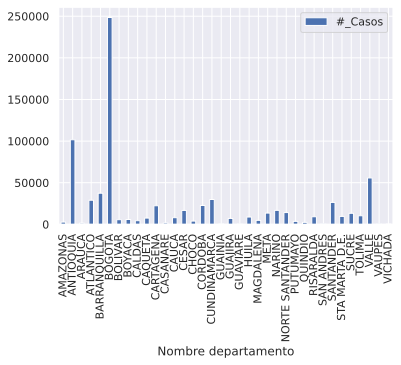

In [87]:
p_1.plot(kind = 'bar');

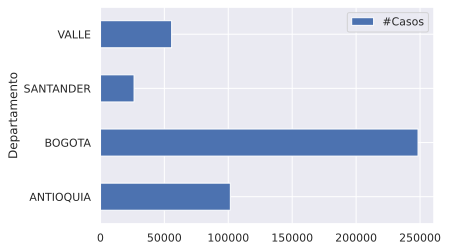

In [78]:
df.groupby("Departamento").max().plot(kind = 'barh');

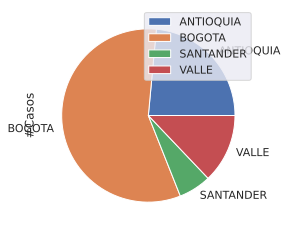

In [85]:
df.groupby("Departamento").max().plot(kind = 'pie', subplots=True);

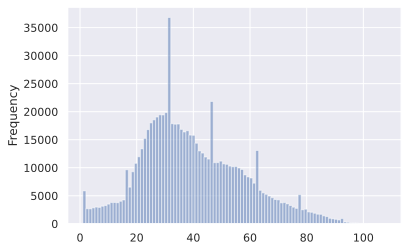

In [84]:
data['Edad'].plot.hist(bins=100, alpha=0.5)

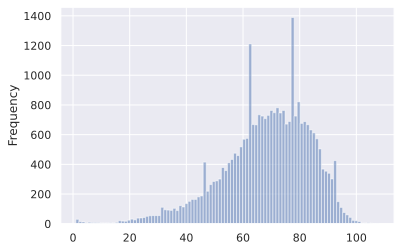

In [83]:
dataMuertos = data[data['Fecha de muerte'] != 'No ha muerto']
dataMuertos['Edad'].plot.hist(bins=100, alpha=0.5)